In [35]:

import csv, math
from matplotlib import pyplot as plt 
import numpy as np 
from decimal import *


In [36]:
# csv file name 
fileNameFormat = "mqttpython-rate-{}.csv"
recordedRates = [int(5*x) for x in [1/5, *range(1,21)]]
recordedModes = ['logs-tls','logs-notls']

# csv file headers
cpuUsage_header = "CPU usage"
ramUsage_header = " RAM usage"
timeStamp_header = "Timestamp"

csvHeaders = [cpuUsage_header, ramUsage_header, timeStamp_header]

In [37]:
# raspi data

data_raspi = {mode : {rate: {header:[] for header in csvHeaders} for rate in recordedRates} for mode in recordedModes}
for mode in recordedModes:
    for rate in recordedRates:
        with open("raspberry-pi/" + mode + "/" + fileNameFormat.format(rate), "r") as csvFile:
            header = csvFile.readline()
            csvFile.readline()
            csvReader = csv.DictReader(csvFile, header.strip().split(","))
            timestamp = 0
            timedelta = 0.1
            for row in csvReader:
                for header in csvHeaders:
                    if header == timeStamp_header:
                        data_raspi[mode][rate][header].append(timestamp)
                        timestamp += timedelta
                    else:
                        data_raspi[mode][rate][header].append(float(row[header]))

In [38]:
# udoo bolt

data_udoobolt = {mode : {rate: {header:[] for header in csvHeaders} for rate in recordedRates} for mode in recordedModes}
for mode in recordedModes:
    for rate in recordedRates:
        with open("udoo-bolt/" + mode + "/" + fileNameFormat.format(rate), "r") as csvFile:
            header = csvFile.readline()
            csvFile.readline()
            csvReader = csv.DictReader(csvFile, header.strip().split(","))
            timestamp = 0
            timedelta = 0.1
            for row in csvReader:
                for header in csvHeaders:
                    if header == timeStamp_header:
                        data_udoobolt[mode][rate][header].append(timestamp)
                        timestamp += timedelta
                    else:
                        data_udoobolt[mode][rate][header].append(float(row[header]))

In [39]:
# process data
avgData_udoobolt = {mode: {cpuUsage_header:[], ramUsage_header:[]} for mode in recordedModes}
avgData_raspi = {mode: {cpuUsage_header:[], ramUsage_header:[]} for mode in recordedModes}
stdData_udoobolt = {mode: {cpuUsage_header:[], ramUsage_header:[]} for mode in recordedModes}
stdData_raspi = {mode: {cpuUsage_header:[], ramUsage_header:[]} for mode in recordedModes}
for mode in recordedModes:
    for rate in recordedRates:
        avgData_udoobolt[mode][cpuUsage_header].append(np.average(data_udoobolt[mode][rate][cpuUsage_header])/2)
        avgData_raspi[mode][cpuUsage_header].append(np.average(data_raspi[mode][rate][cpuUsage_header])/4)

        avgData_udoobolt[mode][ramUsage_header].append(np.average(data_udoobolt[mode][rate][ramUsage_header]))
        avgData_raspi[mode][ramUsage_header].append(np.average(data_raspi[mode][rate][ramUsage_header]))

        stdData_udoobolt[mode][cpuUsage_header].append(np.std(np.array(data_udoobolt[mode][rate][cpuUsage_header])/2))
        stdData_raspi[mode][cpuUsage_header].append(np.std(np.array(data_raspi[mode][rate][cpuUsage_header])/4))

        stdData_udoobolt[mode][ramUsage_header].append(np.std(data_udoobolt[mode][rate][ramUsage_header]))
        stdData_raspi[mode][ramUsage_header].append(np.std(data_raspi[mode][rate][ramUsage_header]))

print("Raspberry pi:", avgData_raspi)#, maxData_raspi)
print("Udoo Bolt:", avgData_udoobolt)#, maxData_udoobolt)

Raspberry pi: {'logs-tls': {'CPU usage': [0.1664715719063545, 0.4432274247491639, 0.7883779264214047, 1.1326923076923077, 1.4314381270903007, 1.7607023411371239, 2.044983277591973, 2.304264214046823, 2.5566053511705684, 2.7938127090301, 3.059866220735786, 3.2438127090301, 3.4209866220735785, 3.6794314381270907, 3.909030100334448, 4.116638795986622, 4.338545150501672, 4.55443143812709, 4.710367892976589, 4.980852842809365, 5.157274247491639], ' RAM usage': [0.19999999999999998, 0.19999999999999998, 0.19999999999999998, 0.19999999999999998, 0.19999999999999998, 0.19999999999999998, 0.19999999999999998, 0.19999999999999998, 0.19999999999999998, 0.19999999999999998, 0.19999999999999998, 0.19999999999999998, 0.19999999999999998, 0.19999999999999998, 0.19999999999999998, 0.19999999999999998, 0.19999999999999998, 0.19999999999999998, 0.19999999999999998, 0.19999999999999998, 0.19999999999999998]}, 'logs-notls': {'CPU usage': [0.1322742474916388, 0.36948160535117053, 0.6910535117056856, 0.9768

In [40]:
print(stdData_raspi, stdData_udoobolt)

{'logs-tls': {'CPU usage': [1.2972049996298787, 1.5619248485631185, 1.7268272163415892, 1.7728180877391444, 1.810697939685258, 1.7771868176918815, 1.790327248085879, 1.676551283970434, 1.6000431948929392, 1.7159831016230525, 1.892449700359493, 1.9025845416606961, 1.7068719888858404, 1.878850341699222, 1.962702490441076, 1.8751703128802941, 1.8356843676023826, 1.821198338762689, 1.5578588765900707, 1.8930163482476112, 1.7940978145760544], ' RAM usage': [2.7755575615628914e-17, 2.7755575615628914e-17, 2.7755575615628914e-17, 2.7755575615628914e-17, 2.7755575615628914e-17, 2.7755575615628914e-17, 2.7755575615628914e-17, 2.7755575615628914e-17, 2.7755575615628914e-17, 2.7755575615628914e-17, 2.7755575615628914e-17, 2.7755575615628914e-17, 2.7755575615628914e-17, 2.7755575615628914e-17, 2.7755575615628914e-17, 2.7755575615628914e-17, 2.7755575615628914e-17, 2.7755575615628914e-17, 2.7755575615628914e-17, 2.7755575615628914e-17, 2.7755575615628914e-17]}, 'logs-notls': {'CPU usage': [1.089812

<ipython-input-41-b2565298e6ed>:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


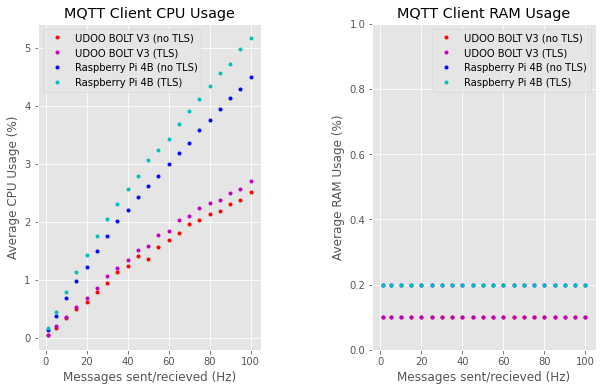

In [41]:
# plotter

plt.style.use("ggplot")

fig = plt.figure(figsize=[10,6])
#fig.tight_layout(pad=10.0)
fig.subplots_adjust(wspace=0.5)

axis = fig.add_subplot(1, 2, 1)

axis.set_title("MQTT Client CPU Usage")

axis.plot(recordedRates, avgData_udoobolt["logs-notls"][cpuUsage_header], 'ro', markersize=3, label='UDOO BOLT V3 (no TLS)')
axis.plot(recordedRates, avgData_udoobolt["logs-tls"][cpuUsage_header], 'mo', markersize=3,label='UDOO BOLT V3 (TLS)')
axis.plot(recordedRates, avgData_raspi["logs-notls"][cpuUsage_header], 'bo', markersize=3,label='Raspberry Pi 4B (no TLS)')
axis.plot(recordedRates, avgData_raspi["logs-tls"][cpuUsage_header], 'co', markersize=3,label='Raspberry Pi 4B (TLS)')

# o facto do MQTT ser muito bursty, faz com que tenha um desvio demasiado grande para representar
#axis.errorbar(recordedRates, avgData_udoobolt["logs-notls"][cpuUsage_header], yerr=stdData_udoobolt["logs-notls"][cpuUsage_header], color='r', markersize=3, label='UDOO BOLT V3 (no TLS)')
#axis.errorbar(recordedRates, avgData_udoobolt["logs-tls"][cpuUsage_header], yerr=stdData_udoobolt["logs-tls"][cpuUsage_header], color='m', markersize=3,label='UDOO BOLT V3 (TLS)')
#axis.errorbar(recordedRates, avgData_raspi["logs-notls"][cpuUsage_header], yerr=stdData_raspi["logs-notls"][cpuUsage_header], color='b',markersize=3,label='Raspberry Pi 4B (no TLS)')
#axis.errorbar(recordedRates, avgData_raspi["logs-tls"][cpuUsage_header], yerr=stdData_raspi["logs-tls"][cpuUsage_header], color='c', markersize=3,label='Raspberry Pi 4B (TLS)')


#axis.set_xscale("log")
#axis.set_yscale("log")
axis.set_ylabel('Average CPU Usage (%)')
axis.set_xlabel('Messages sent/recieved (Hz)')
axis.legend()

axis = fig.add_subplot(1, 2, 2)

axis.set_title("MQTT Client RAM Usage")

axis.plot(recordedRates, avgData_udoobolt["logs-notls"][ramUsage_header], 'ro', markersize=3,label='UDOO BOLT V3 (no TLS)')
axis.plot(recordedRates, avgData_udoobolt["logs-tls"][ramUsage_header], 'mo', markersize=3,label='UDOO BOLT V3 (TLS)')

axis.plot(recordedRates, avgData_raspi["logs-notls"][ramUsage_header], 'bo',markersize=3,label='Raspberry Pi 4B (no TLS)')

axis.plot(recordedRates, avgData_raspi["logs-tls"][ramUsage_header], 'co' ,markersize=3,label='Raspberry Pi 4B (TLS)')


#axis.set_xscale("log")
axis.set_ylabel('Average RAM Usage (%)')
axis.set_ylim(0, 1)
axis.set_xlabel('Messages sent/recieved (Hz)')
axis.legend()

fig.show()

fig.savefig('mqtt.pdf')

In [42]:
datalogs = {"logs-notls" : {cpuUsage_header: None, ramUsage_header: None}, "logs-tls" : {cpuUsage_header: None, ramUsage_header: None}}

datalogs["logs-notls"][cpuUsage_header] = np.divide(avgData_raspi["logs-notls"][cpuUsage_header], avgData_udoobolt["logs-notls"][cpuUsage_header])
datalogs["logs-notls"][ramUsage_header] = np.divide(avgData_raspi["logs-notls"][ramUsage_header], avgData_udoobolt["logs-notls"][ramUsage_header])
datalogs["logs-tls"][cpuUsage_header] = np.divide(avgData_raspi["logs-tls"][cpuUsage_header], avgData_udoobolt["logs-tls"][cpuUsage_header])
datalogs["logs-tls"][ramUsage_header] = np.divide(avgData_raspi["logs-tls"][ramUsage_header], avgData_udoobolt["logs-tls"][ramUsage_header])

print("Performance difference:")
print("NOTLS")
print("CPU: {} +- {}", np.average(datalogs["logs-notls"][cpuUsage_header]), np.std(datalogs["logs-notls"][cpuUsage_header]))
print("RAM: {} +- {}", np.average(datalogs["logs-notls"][ramUsage_header]), np.std(datalogs["logs-notls"][ramUsage_header]))
print("TLS")
print("CPU: {} +- {}", np.average(datalogs["logs-tls"][cpuUsage_header]), np.std(datalogs["logs-tls"][cpuUsage_header]))
print("RAM: {} +- {}", np.average(datalogs["logs-tls"][ramUsage_header]), np.std(datalogs["logs-tls"][ramUsage_header]))


Performance difference:
NOTLS
CPU: {} +- {} 1.8775828428322554 0.20513144324916396
RAM: {} +- {} 2.0 0.0
TLS
CPU: {} +- {} 2.0077927406256757 0.31439562796870224
RAM: {} +- {} 2.0 0.0


In [43]:
# export to latex
# ...